1) Выбор датасета.
Ссылка на исследуемый датасет: https://www.kaggle.com/datasets/mohithsairamreddy/salary-data/data

2) Описание датасета.
Датасет представляет собой набор данных о зарплате сотрудников, работающих в одной компании.
Всего было собрано 6704 точки данных. 
    
1. Предметная область: зарплата сотрудников;
Источник данных: ссылки на источники в описании датасета отсутствуют, данные были получены из нескольких источников, 
включая опросы, сайты объявлений о вакансиях и других общедоступных источников (см. описание датасета на сайте);
Характер данных: реальные.

2. Атрибуты датасета: 
a) Age: возраст сотрудника, тип - числовой;
b) Years of Experience: опыт работы сотрудника (по количеству лет), тип - числовой; 
c) Job title: занимаемая должность сотрудника, тип неопределен, так как его невозможно преобразовать ни в один из возможных;
d) Education level: уровень образования сотрудника, тип - строковый;
e) Salary: зарплата сотрудника, тип - числовой.

3. Описание задачи анализа: -

3) Характеристики атрибутов.
1. Среднее значение и ско для каждого атрибута;
2. Гистограмма распределения значений, наличие выбросов;
3. Матрица графиков рассеивания;
4. Анализ данных;
   

4) Корреляция между параметрами.
1. Какие атрибуты высококоррелированы, определить характер корреляции;
2. Какие атрибуты не имеют корреляцию;
3. Графики рассеивания;
4. Анализ данных;




In [51]:
# Проверка на правильность содержащихся данных в файле
import numpy as np
import pandas as pd
df = pd.read_csv ('C:/Users/саша/Desktop/3 КУРС/МАШ ОБУЧЕНИЕ/Salary_Data.csv')
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


#3) 1. Среднее значение для каждого атрибута 

Среднее значение не может быть найдено для атрибута "Job Title", так как он содержит такие символы, которые невозможно пребразовать в числовые: функция pd.numeric() выдает для каждой строки значение Nan. 

In [4]:
df['Age'].mean()

33.62085944494181

In [6]:
df['Years of Experience'].mean()

8.094687360095508

In [7]:
df['Salary'].mean()

115326.96477086132

In [50]:
# Для удобства вычисления среднего значения каждому уровню образования в одноименном атрибуте было присвоено собственное число при помощи функции pd.to_numeric().
data['Education Level'] = data['Education Level'].replace({"Bachelor's": 3, "Master's": 4, "Bachelor's Degree": 5, "Master's Degree": 6, "High School": 2, "PhD": 7, "phD": 8})
data['Education Level'] = pd.to_numeric(data['Education Level'], errors='coerce')
data['Education Level'].mean()

5.17430234293389

#3) 1. СКО для каждого атрибута

СКО не может быть найдено для атрибута "Job Title", так как он содержит такие символы, которые невозможно пребразовать в числовые: функция pd.numeric() выдает для каждой строки значение Nan.

In [10]:
df['Age'].std()

7.614632626251303

In [11]:
df['Years of Experience'].std()

6.059003056634102

In [12]:
df['Salary'].std()

52786.18391068297

In [52]:
# Для удобства вычисления CКО каждому уровню образования в одноименном атрибуте было присвоено собственное число при помощи функции pd.to_numeric().
data['Education Level'] = data['Education Level'].replace({"Bachelor's": 3, "Master's": 4, "Bachelor's Degree": 5, "Master's Degree": 6, "High School": 2, "PhD": 7, "phD": 8})
data['Education Level'] = pd.to_numeric(data['Education Level'], errors='coerce')
data['Education Level'].std()

1.455530618917018

#3) 2. Гистограмма распределения значений

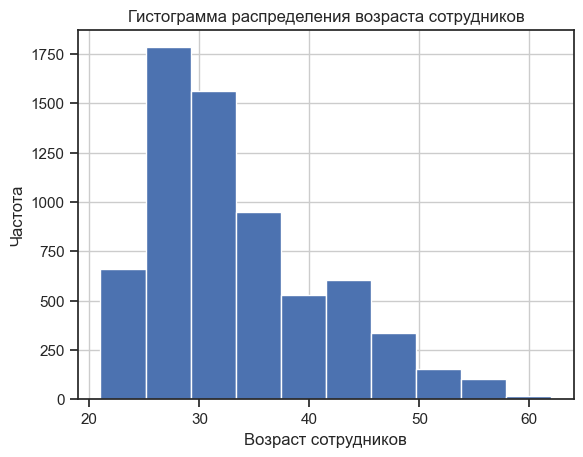

Выбросы:        Age  Gender    Education Level                  Job Title  \
1211  61.0    Male                PhD  Software Engineer Manager   
1223  57.0    Male                PhD  Software Engineer Manager   
1225  62.0    Male                PhD  Software Engineer Manager   
1236  62.0    Male                PhD  Software Engineer Manager   
1240  55.0    Male                PhD  Software Engineer Manager   
...    ...     ...                ...                        ...   
3058  54.0    Male    Master's Degree   Senior Software Engineer   
3067  54.0    Male  Bachelor's Degree        Full Stack Engineer   
3084  54.0  Female                PhD  Software Engineer Manager   
3104  54.0    Male                PhD  Software Engineer Manager   
3120  54.0    Male                PhD  Software Engineer Manager   

      Years of Experience    Salary  
1211                 20.0  200000.0  
1223                 18.0  195000.0  
1225                 19.0  200000.0  
1236                 2

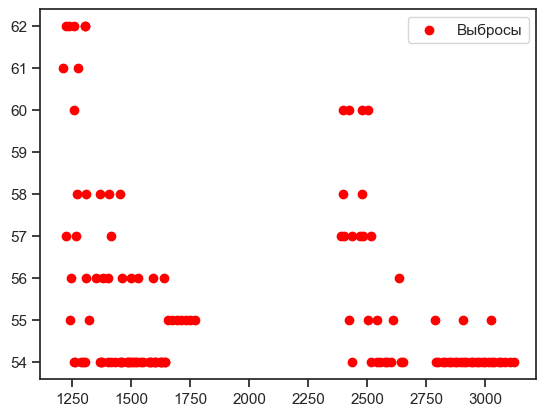

In [78]:
# Гистограмма и выбросы для возраста сотрудников
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('C:/Users/саша/Desktop/3 КУРС/МАШ ОБУЧЕНИЕ/Salary_Data.csv')
data = pd.read_csv('C:/Users/саша/Desktop/3 КУРС/МАШ ОБУЧЕНИЕ/Salary_Data.csv')

df['Age'].hist()
plt.title('Гистограмма распределения возраста сотрудников')
plt.xlabel('Возраст сотрудников')
plt.ylabel('Частота')
plt.show()


q1 = data['Age'].quantile(0.25)
q3 = data['Age'].quantile(0.75)
q_range = q3 - q1
lower_bound = q1 - 1.5 * q_range
upper_bound = q3 + 1.5 * q_range
outliers = data[(data['Age'] < lower_bound) | (data['Age'] > upper_bound)]


print("Выбросы:", outliers)
print("Выбросы:", outliers)
plt.scatter(outliers.index, outliers['Age'], color='red', label='Выбросы')
plt.legend()
plt.show()

# Выбросы обнаружены

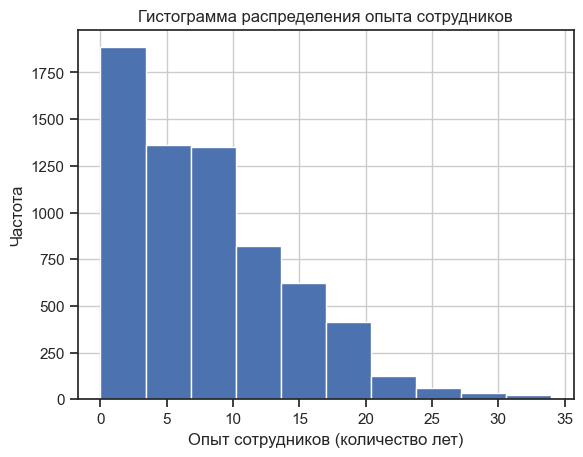

Выбросы:        Age  Gender  Education Level                  Job Title  \
2378  53.0   Other      High School    Senior Project Engineer   
2387  57.0  Female              PhD        Full Stack Engineer   
2392  52.0  Female  Master's Degree   Senior Software Engineer   
2396  60.0  Female              PhD  Software Engineer Manager   
2398  58.0    Male  Master's Degree   Senior Software Engineer   
...    ...     ...              ...                        ...   
3076  52.0    Male              PhD  Software Engineer Manager   
3084  54.0  Female              PhD  Software Engineer Manager   
3104  54.0    Male              PhD  Software Engineer Manager   
3120  54.0    Male              PhD  Software Engineer Manager   
3126  48.0    Male              PhD   Senior Software Engineer   

      Years of Experience    Salary  
2378                 31.0  166109.0  
2387                 30.0  121450.0  
2392                 28.0  186963.0  
2396                 33.0  179180.0  
2398    

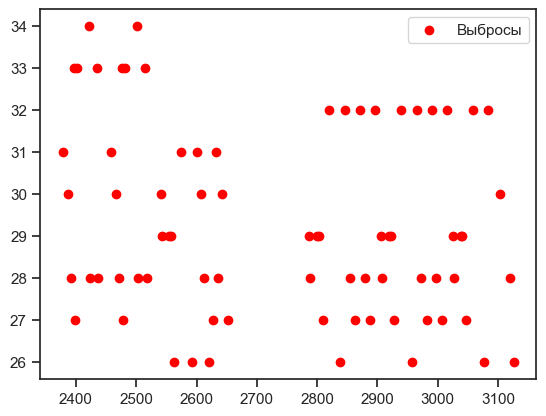

In [77]:
# Гистограмма и выбросы для опыта сотрудников
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('C:/Users/саша/Desktop/3 КУРС/МАШ ОБУЧЕНИЕ/Salary_Data.csv')
data = pd.read_csv('C:/Users/саша/Desktop/3 КУРС/МАШ ОБУЧЕНИЕ/Salary_Data.csv')

df['Years of Experience'].hist()
plt.title('Гистограмма распределения опыта сотрудников')
plt.xlabel('Опыт сотрудников (количество лет)')
plt.ylabel('Частота')
plt.show()

q1 = data['Years of Experience'].quantile(0.25)
q3 = data['Years of Experience'].quantile(0.75)
q_range = q3 - q1
lower_bound = q1 - 1.5 * q_range
upper_bound = q3 + 1.5 * q_range
outliers = data[(data['Years of Experience'] < lower_bound) | (data['Years of Experience'] > upper_bound)]


print("Выбросы:", outliers)
print("Выбросы:", outliers)
plt.scatter(outliers.index, outliers['Years of Experience'], color='red', label='Выбросы')
plt.legend()
plt.show()

# Выбросы обнаружены

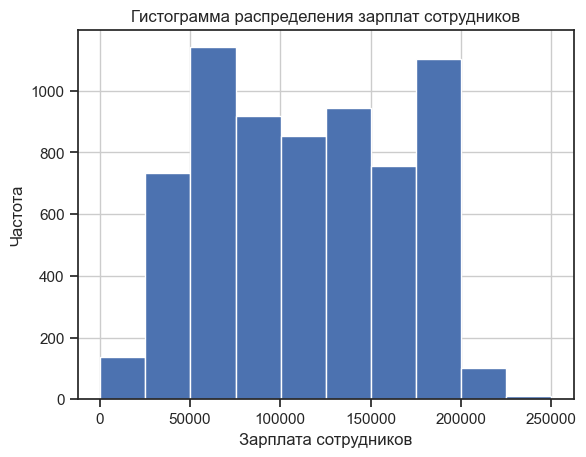

Выбросы: Empty DataFrame
Columns: [Age, Gender, Education Level, Job Title, Years of Experience, Salary]
Index: []


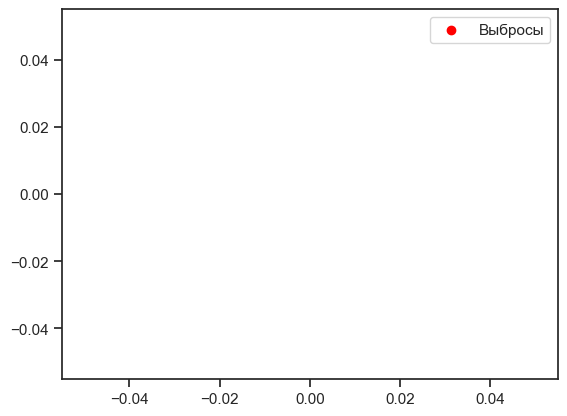

In [76]:
# Гистограмма и выбросы для зарплат сотрудников
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('C:/Users/саша/Desktop/3 КУРС/МАШ ОБУЧЕНИЕ/Salary_Data.csv')

data['Salary'].hist()
plt.title('Гистограмма распределения зарплат сотрудников')
plt.xlabel('Зарплата сотрудников')
plt.ylabel('Частота')
plt.show()

q1 = data['Salary'].quantile(0.25)
q3 = data['Salary'].quantile(0.75)
q_range = q3 - q1
lower_bound = q1 - 1.5 * q_range
upper_bound = q3 + 1.5 * q_range
outliers = data[(data['Salary'] < lower_bound) | (data['Salary'] > upper_bound)].reset_index(drop=True)

print("Выбросы:", outliers)
plt.scatter(outliers.index, outliers['Salary'], color='red', label='Выбросы')
plt.legend()
plt.show()

# Выбросы для данного атрибута не обнаружены

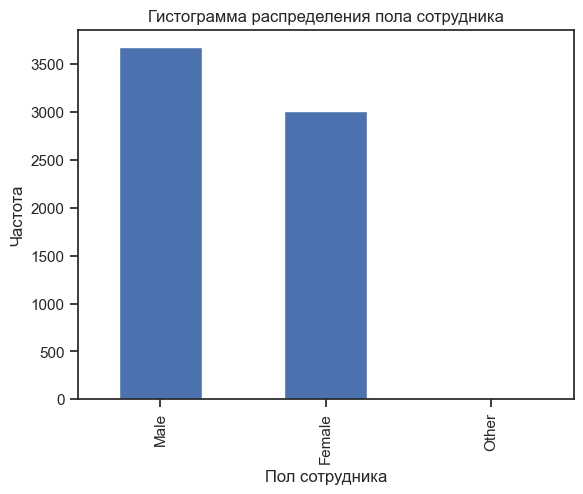

Количество полов:  Gender
Male      3674
Female    3014
Other       14
Name: count, dtype: int64


In [57]:
# Гистограмма и выбросы для пола сотрудников
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('C:/Users/саша/Desktop/3 КУРС/МАШ ОБУЧЕНИЕ/Salary_Data.csv')
df['Gender'].value_counts().plot(kind='bar')

plt.xlabel('Пол сотрудника')
plt.ylabel('Частота')
plt.title('Гистограмма распределения пола сотрудника')

plt.show()

out = df['Gender'].value_counts()
print('Количество полов: ', out)

# Выбросы для данного атрибута не обнаружены

In [58]:
# Гистограмма и выбросы для занимаемой должности
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv('C:/Users/саша/Desktop/3 КУРС/МАШ ОБУЧЕНИЕ/Salary_Data.csv')


plt.figure(figsize=(100, 100))
sns.countplot(data['Job Title'])
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.title('Гистограмма распределения значений')
plt.xticks(rotation=90)
plt.show()

out = df['Job Title'].value_counts()
print('Количество Должностей: ', out)

#outliers = data['Job Title'].value_counts()
#outliers = outliers[outliers < outliers.quantile(0.25)]
#filtered_data = data[data['Job Title'].isin(outliers.index)]
#print("Выбросы:", outliers)

# Выбросы для данного атрибута не обнаружены, вместо них подсчитано количество сотружников на каждой должности

Количество Должностей:  Job Title
Software Engineer             518
Data Scientist                453
Software Engineer Manager     376
Data Analyst                  363
Senior Project Engineer       318
                             ... 
Account Manager                 1
Help Desk Analyst               1
Senior Training Specialist      1
Junior Web Designer             1
Supply Chain Analyst            1
Name: count, Length: 193, dtype: int64


#3) 3. Матрица графиков рассеивания

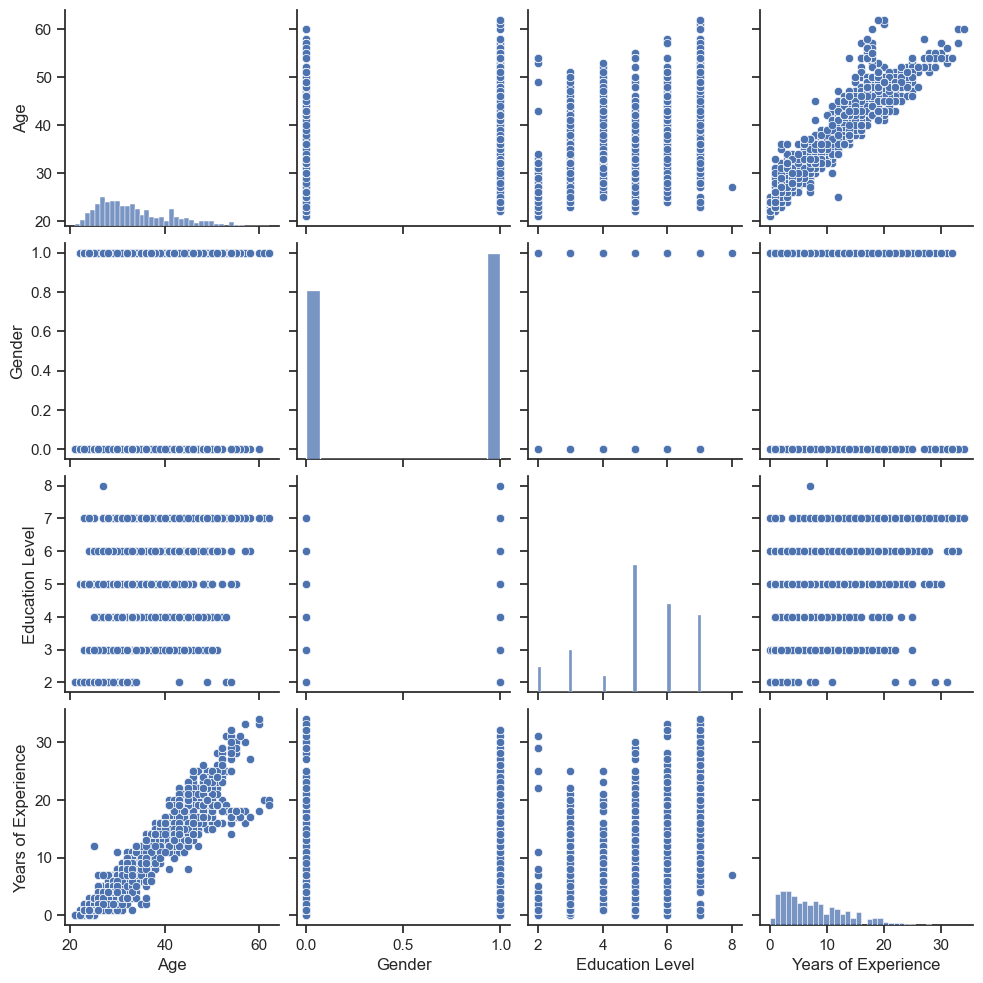

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


data = pd.read_csv('C:/Users/саша/Desktop/3 КУРС/МАШ ОБУЧЕНИЕ/Salary_Data.csv')


data['Education Level'] = data['Education Level'].replace({"Bachelor's": 3, "Master's": 4, "Bachelor's Degree": 5, "Master's Degree": 6, "High School": 2, "PhD": 7, "phD": 8})
data['Education Level'] = pd.to_numeric(data['Education Level'], errors='coerce')
data['Gender'] = data ['Gender'].replace({"Male": 1, "Female": 0})
data['Gender'] = pd.to_numeric(data['Gender'], errors='coerce')


data_new = data.drop('Job Title', axis=1) # Атрибут 'Job Title' был исключен из рассмотрения, так как его тип невозможно преобразовать в числовой


attributes = ['Age', 'Gender', 'Education Level', 'Years of Experience'] 
subset = data_new[attributes]
sns.pairplot(subset)


plt.show()

#3) 4. Анализ данных: 
На основе данных о среднем значении и СКО можно сделать следующие выводы:
- Средний возраст сотрудника: 33 года, средний опыт работы: 8 лет, средняя зарплата: 115326, средний уровень образования: 5.1, что говорит о том, что самый распространенный уровень образования это Bachelor's Degree
- СКО для возраста: 7, СКО для зарплаты: 52786, СКО для опыта работы: 6, СКО для уровня образования: 1.5

На основе гистограмм можно сделать следующие выводы:
- Самый распространенный возраст сотрудника лежит в пределах от 25 до 30 лет
- Самый распространенный опыт работы лежит в пределах от 0 до 4 лет
- 2 наиболее распространенные зарплаты лежат в пределах от 50000 до 75000
- Самым распространенным уровнем образования среди сотрудников является Bachelor's Degree и судя по названиям должностей, это IT компания
- 3 наиболее самые распространенные должности соответственно: Software Engeneer, Data Scientist и Software Engeneer Manager
- В компании работает больше мужчин, чем женщин

На основе матрицы рассеивания можно сделать следующие выводы (диагональные ячейки исключим из рассмотрения):
- С возратом у сотрудника растет опыт работы
- Сотрудники, у которых больше опыта, имеют более высокий уровень образования
- В данной компании в среднем мужчины немного старше женщин, имеют более высокий уровень образования, но чуть меньший опыт работы
- В графиках матрицы можно наблюдать выбросы, найденные при построении диаграмм
- На графике зависимости возраста и опыта работы прослеживается линейная зависисмость

#4) 1-2. Корреляция атрибутов и ее характер

Корреляция между двумя атрибутами:                           Age  Years of Experience    Salary  Education Level  \
Age                  1.000000             0.937655  0.728053         0.510959   
Years of Experience  0.937655             1.000000  0.808969         0.510568   
Salary               0.728053             0.808969  1.000000         0.451407   
Education Level      0.510959             0.510568  0.451407         1.000000   
Gender               0.117395             0.098717  0.127228         0.041597   

                       Gender  
Age                  0.117395  
Years of Experience  0.098717  
Salary               0.127228  
Education Level      0.041597  
Gender               1.000000  


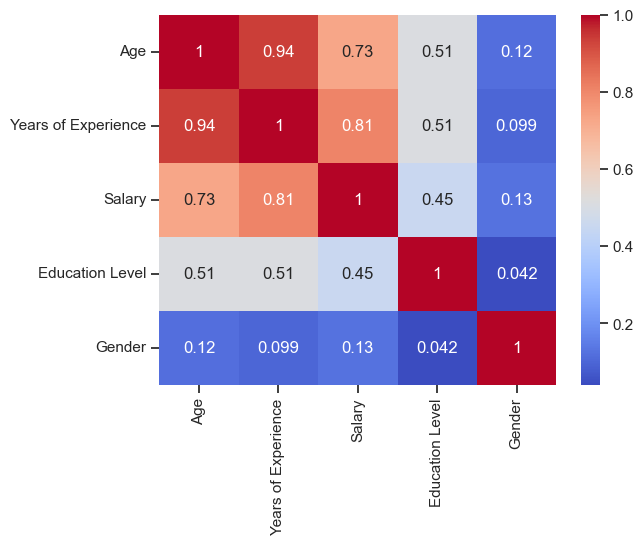

In [47]:
import pandas as pd
import seaborn as sns

data = pd.read_csv('C:/Users/саша/Desktop/3 КУРС/МАШ ОБУЧЕНИЕ/Salary_Data.csv')
df = pd.read_csv('C:/Users/саша/Desktop/3 КУРС/МАШ ОБУЧЕНИЕ/Salary_Data.csv')

data['Education Level'] = data['Education Level'].replace({"Bachelor's": 3, "Master's": 4, "Bachelor's Degree": 5, "Master's Degree": 6, "High School": 2, "PhD": 7, "phD": 8})
data['Education Level'] = pd.to_numeric(data['Education Level'], errors='coerce')
data['Gender'] = data ['Gender'].replace({"Male": 1, "Female": 0})
data['Gender'] = pd.to_numeric(data['Gender'], errors='coerce')

data_new = data.drop('Job Title', axis=1)

attributes = ['Age', 'Years of Experience', 'Salary', 'Education Level', 'Gender']
subset = data_new[attributes]

correlation_matrix = subset.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')


print('Корреляция между двумя атрибутами:', correlation_matrix)

#4) 3. Графики рассеивания
Построим графики рассеивания 2 переменных на основе данных матрицы корреляции, то есть наглядно продемонстрируем степень корреляции между атрибутами

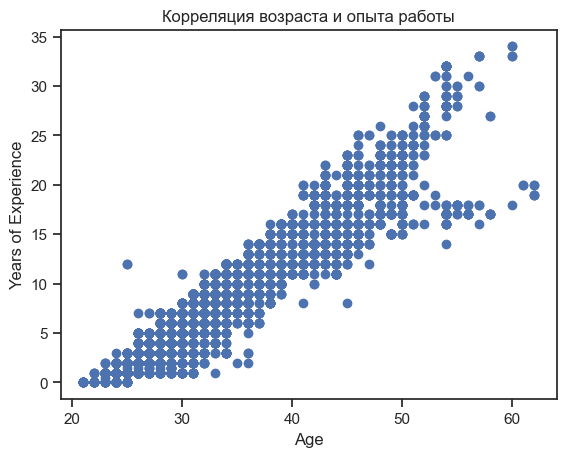

In [81]:
# Высокая корреляция: график атрибутов Age - Years of Experience
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('C:/Users/саша/Desktop/3 КУРС/МАШ ОБУЧЕНИЕ/Salary_Data.csv')

x = df['Age']
y = df['Years of Experience']

plt.scatter(x, y)
plt.xlabel('Age')
plt.ylabel('Years of Experience')
plt.title('Корреляция возраста и опыта работы')

plt.show()

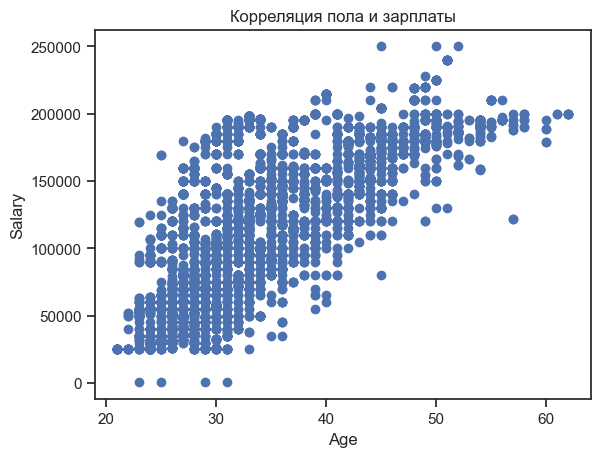

In [82]:
# Высокая корреляция: график атрибутов Age - Salary
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('C:/Users/саша/Desktop/3 КУРС/МАШ ОБУЧЕНИЕ/Salary_Data.csv')

x = df['Age']
y = df['Salary']

plt.scatter(x, y)
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Корреляция пола и зарплаты')

plt.show()

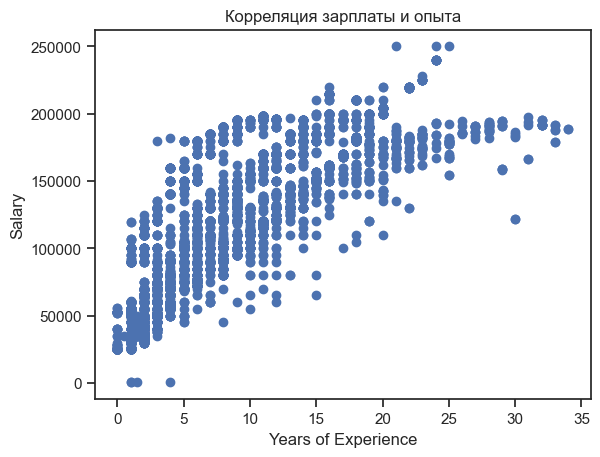

In [80]:
# Высокая корреляция: график атрибутов Years of Experience - Salary
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('C:/Users/саша/Desktop/3 КУРС/МАШ ОБУЧЕНИЕ/Salary_Data.csv')

x = df['Years of Experience']
y = df['Salary']

plt.scatter(x, y)
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Корреляция зарплаты и опыта')

plt.show()

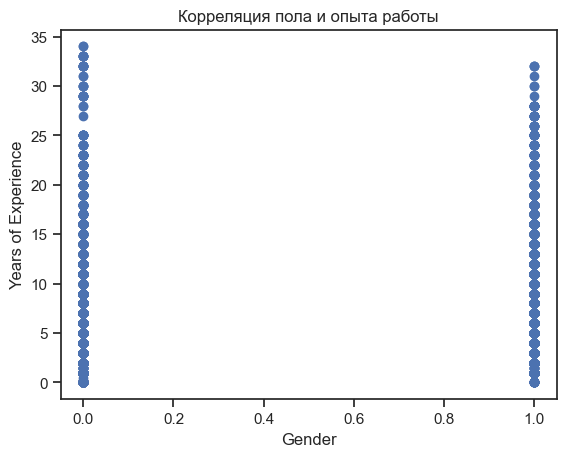

In [79]:
# Очень маленькая корреляция: график атрибутов Gender - Years of Experience
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('C:/Users/саша/Desktop/3 КУРС/МАШ ОБУЧЕНИЕ/Salary_Data.csv')

df['Gender'] = df['Gender'].replace({"Male": 1, "Female": 0})
df['Gender'] = pd.to_numeric(df['Gender'], errors='coerce')

x = df['Gender']
y = df['Years of Experience']

plt.scatter(x, y)
plt.xlabel('Gender')
plt.ylabel('Years of Experience')
plt.title('Корреляция пола и опыта работы')

plt.show()

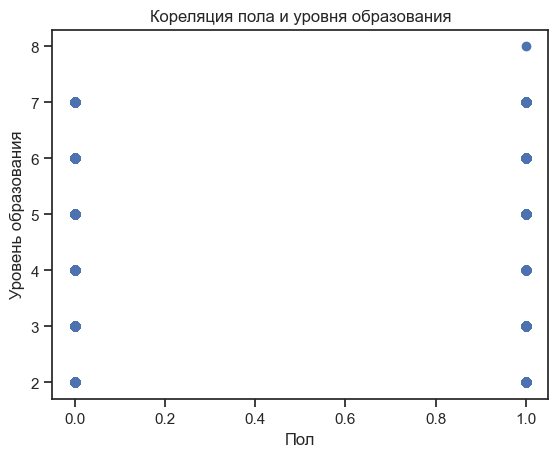

In [75]:
# Очень маленькая корреляция: график атрибутов Gender - Education Level
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('C:/Users/саша/Desktop/3 КУРС/МАШ ОБУЧЕНИЕ/Salary_Data.csv')

df['Gender'] = df['Gender'].replace({"Male": 1, "Female": 0})
df['Gender'] = pd.to_numeric(df['Gender'], errors='coerce')
df['Education Level'] = df['Education Level'].replace({"Bachelor's": 3, "Master's": 4, "Bachelor's Degree": 5, "Master's Degree": 6, "High School": 2, "PhD": 7, "phD": 8})
df['Education Level'] = pd.to_numeric(df['Education Level'], errors='coerce')

x = df['Gender']
y = df['Education Level']

plt.scatter(x, y)
plt.xlabel('Пол')
plt.ylabel('Уровень образования')
plt.title('Кореляция пола и уровня образования')

plt.show()

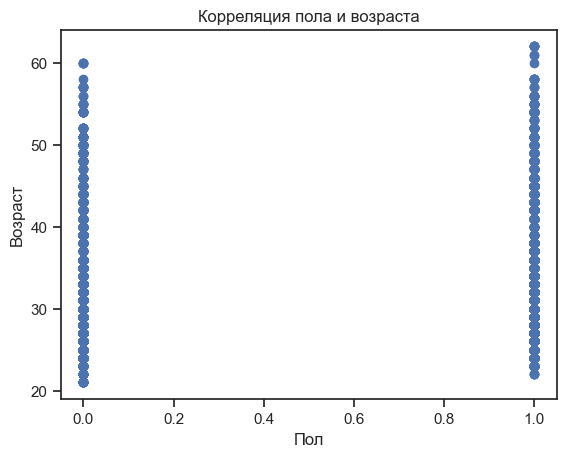

In [73]:
# Очень маленькая корреляция: график атрибутов Gender - Age
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('C:/Users/саша/Desktop/3 КУРС/МАШ ОБУЧЕНИЕ/Salary_Data.csv')

df['Gender'] = df['Gender'].replace({"Male": 1, "Female": 0})
df['Gender'] = pd.to_numeric(df['Gender'], errors='coerce')

x = df['Gender']
y = df['Age']

plt.scatter(x, y)
plt.xlabel('Пол')
plt.ylabel('Возраст')
plt.title('Корреляция пола и возраста')

plt.show()

#4) 4. Анализ данных:
На основе матрицы корреляции можно сделать следующие выводы (диагональные ячейки исключим из рассмотрения):
- Высокую корреляцию имеют пары следующих атрибутов: Age - Years of Experience, Age - Salary и Years of Experience - Salary
- Среднюю корреляцию имеют пары атрибутов: Years of Experience - Education Level, ниже среднего: Salary - Education Level
- Почти не имею корреляцию пары атрибутов: Gender - Years of Experience, Gender - Education Level и Gender - Age

На основе графиков рассеивания для пар атрибутов можно сделать следующий вывод:
- Графики рассеивания повторяют графики из матрицы корреляции из П3 и демонстрируют корреляцию или ее отсутсивие более наглядно
- Графики рассеивания подтверждают выводы из П3, сделанные на основе матрицы графиков рассеивания